In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create dataset with 20 features, but only 5 informative
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5,
                           n_redundant=5, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


L1 Regularization (Lasso, Logistic Regression with L1)

In [2]:
from sklearn.linear_model import Lasso

# L1 regularization (Lasso)
lasso = Lasso(alpha=0.1)   # alpha = λ strength
lasso.fit(X_train, y_train)

print("Lasso coefficients:", lasso.coef_)


Lasso coefficients: [-0.          0.          0.          0.         -0.          0.
  0.          0.         -0.         -0.          0.         -0.
  0.         -0.13763202  0.          0.         -0.          0.
  0.          0.        ]


Example 2: Logistic Regression with L1

In [3]:
from sklearn.linear_model import LogisticRegression

# Logistic regression with L1 penalty
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
logreg_l1.fit(X_train, y_train)

y_pred = logreg_l1.predict(X_test)
print("LogReg L1 Accuracy:", accuracy_score(y_test, y_pred))
print("Non-zero coefficients:", np.sum(logreg_l1.coef_ != 0))


LogReg L1 Accuracy: 0.8333333333333334
Non-zero coefficients: 14


L2 Regularization (Ridge, Logistic Regression with L2)

Example 1: Ridge Regression

In [4]:
from sklearn.linear_model import Ridge

# L2 regularization (Ridge)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

print("Ridge coefficients:", ridge.coef_)


Ridge coefficients: [-0.03443154  0.01550835  0.00441345  0.01263947 -0.02386755  0.03077296
  0.03267802  0.02333198 -0.01042097 -0.04397329  0.02495647 -0.03013902
  0.01605853 -0.08220145 -0.00581518  0.01272193 -0.00981007  0.01498964
  0.0404885   0.00283685]


Example 2: Logistic Regression with L2

In [5]:
# Logistic regression with L2 penalty
logreg_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
logreg_l2.fit(X_train, y_train)

y_pred = logreg_l2.predict(X_test)
print("LogReg L2 Accuracy:", accuracy_score(y_test, y_pred))


LogReg L2 Accuracy: 0.8333333333333334


Elastic Net (L1 + L2)

Example 1: Elastic Net Regression

In [6]:
from sklearn.linear_model import ElasticNet

# Elastic Net (L1 + L2)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio=0.5 → mix of L1 & L2
elastic.fit(X_train, y_train)

print("ElasticNet coefficients:", elastic.coef_)


ElasticNet coefficients: [-0.          0.          0.          0.         -0.          0.0054038
  0.          0.          0.         -0.          0.00513745 -0.
  0.         -0.14609404  0.          0.         -0.          0.
  0.          0.        ]


Example 2: Logistic Regression with Elastic Net

In [7]:
# Logistic regression with Elastic Net
logreg_en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0)
logreg_en.fit(X_train, y_train)

y_pred = logreg_en.predict(X_test)
print("LogReg Elastic Net Accuracy:", accuracy_score(y_test, y_pred))
print("Non-zero coefficients:", np.sum(logreg_en.coef_ != 0))


LogReg Elastic Net Accuracy: 0.8366666666666667
Non-zero coefficients: 17


C:\Users\Sujit\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Comparions of all the three regularizations

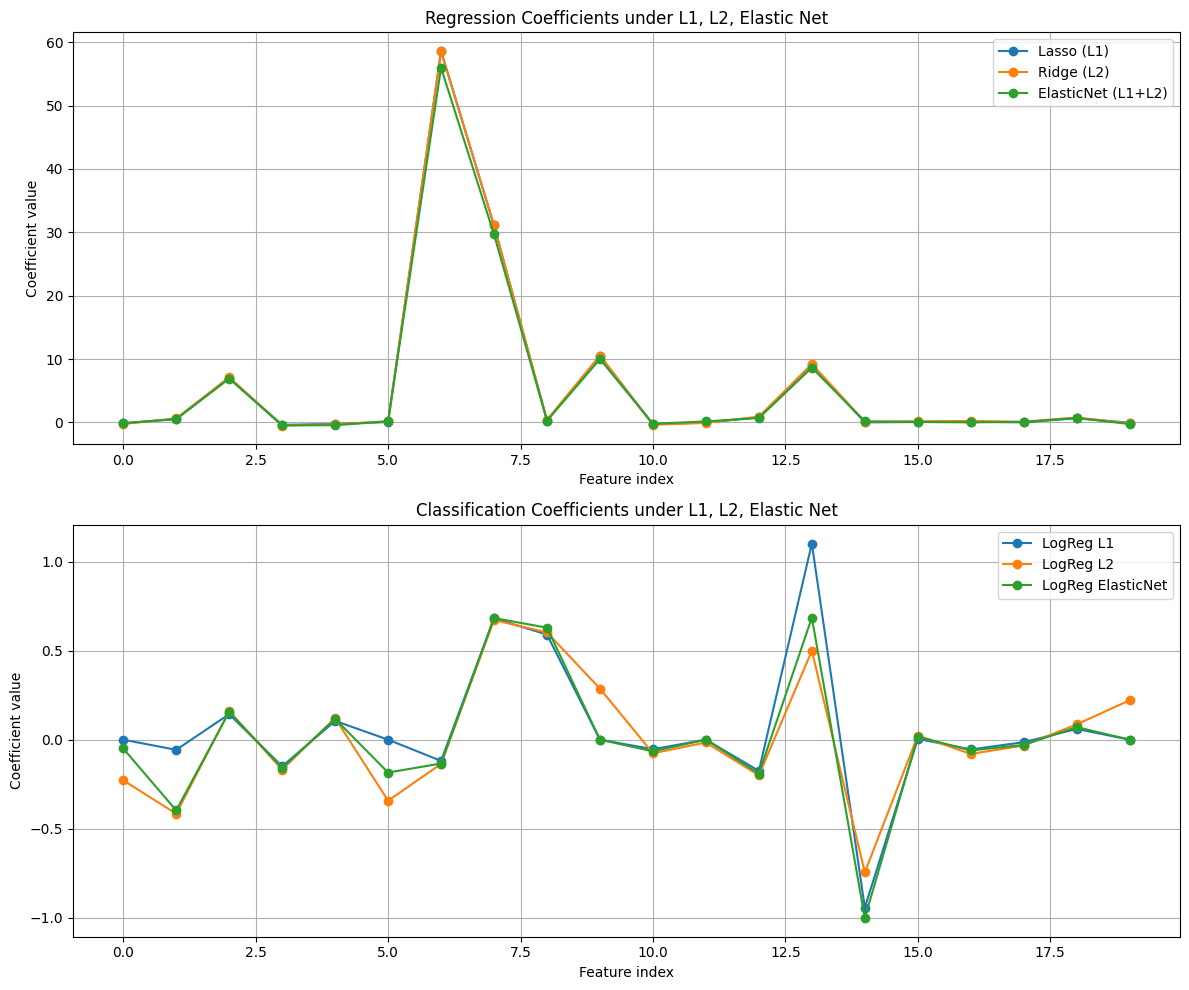

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split

# 1. Regression dataset
X_reg, y_reg = make_regression(
    n_samples=500,
    n_features=20,
    n_informative=5,
    noise=10.0,
    random_state=42
)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# 2. Classification dataset
X_clf, y_clf = make_classification(
    n_samples=500,
    n_features=20,
    n_informative=5,
    n_redundant=5,
    n_classes=2,
    random_state=42
)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42
)

# ------------------ Regression Models ------------------ #
lasso = Lasso(alpha=0.1).fit(X_reg_train, y_reg_train)
ridge = Ridge(alpha=1.0).fit(X_reg_train, y_reg_train)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X_reg_train, y_reg_train)

# Collect coefficients
coef_reg = {
    "Lasso (L1)": lasso.coef_,
    "Ridge (L2)": ridge.coef_,
    "ElasticNet (L1+L2)": elastic.coef_
}

# ------------------ Classification Models ------------------ #
logreg_l1 = LogisticRegression(penalty="l1", solver="liblinear", C=1.0).fit(X_clf_train, y_clf_train)
logreg_l2 = LogisticRegression(penalty="l2", solver="liblinear", C=1.0).fit(X_clf_train, y_clf_train)
logreg_en = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5, C=1.0, max_iter=5000).fit(X_clf_train, y_clf_train)

coef_clf = {
    "LogReg L1": logreg_l1.coef_[0],
    "LogReg L2": logreg_l2.coef_[0],
    "LogReg ElasticNet": logreg_en.coef_[0]
}

# ------------------ Plotting ------------------ #
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot regression coefficients
x_axis = np.arange(X_reg.shape[1])
for name, coef in coef_reg.items():
    axes[0].plot(x_axis, coef, marker="o", label=name)
axes[0].set_title("Regression Coefficients under L1, L2, Elastic Net")
axes[0].set_xlabel("Feature index")
axes[0].set_ylabel("Coefficient value")
axes[0].legend()
axes[0].grid(True)

# Plot classification coefficients
x_axis = np.arange(X_clf.shape[1])
for name, coef in coef_clf.items():
    axes[1].plot(x_axis, coef, marker="o", label=name)
axes[1].set_title("Classification Coefficients under L1, L2, Elastic Net")
axes[1].set_xlabel("Feature index")
axes[1].set_ylabel("Coefficient value")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


Here you go ✅

Top plot (Regression):

- Lasso (L1): pushes many coefficients exactly to zero (sparsity).

- Ridge (L2): shrinks coefficients smoothly but none go to zero.

- Elastic Net: mixture — some coefficients zero, others shrunk.

Bottom plot (Classification):

Same behavior:

- L1 Logistic Regression: sparse, only a few non-zero coefficients.

- L2 Logistic Regression: small weights everywhere.

- Elastic Net: balance between sparsity and shrinkage.

This way, you can visually see how each regularization changes the learned weights.

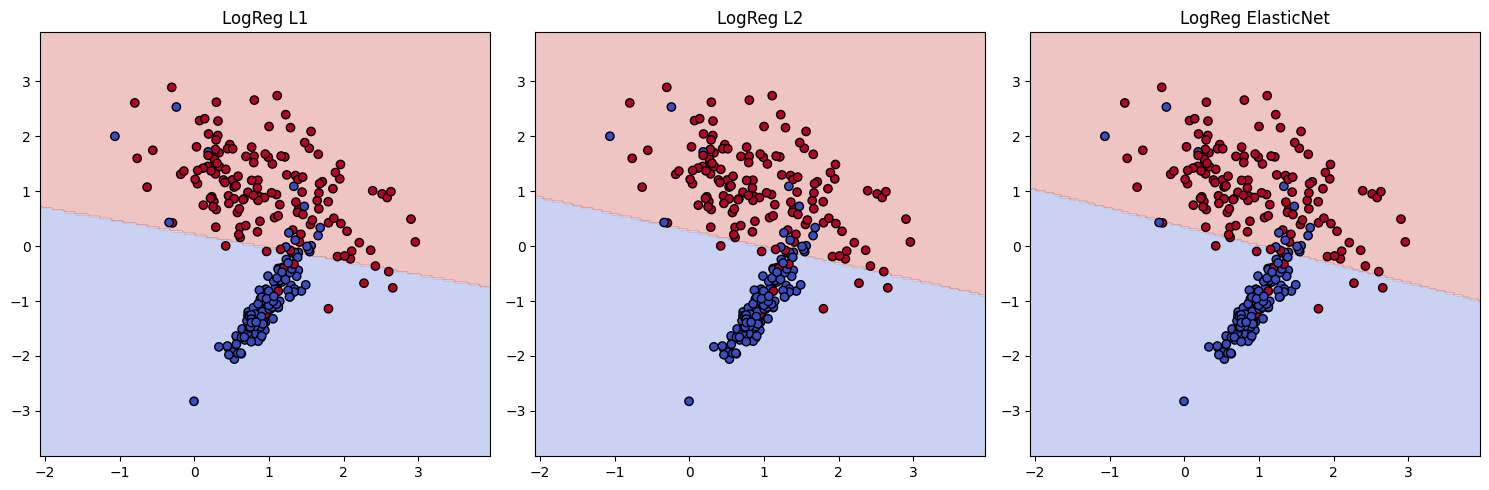

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Step 1: Create a simple 2D dataset
X, y = make_classification(
    n_samples=300,
    n_features=2,       # 2D so we can plot
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    flip_y=0.05,
    random_state=42
)

# Step 2: Train logistic regression models with different regularizations
models = {
    "LogReg L1": LogisticRegression(penalty="l1", solver="liblinear", C=0.5, random_state=42).fit(X, y),
    "LogReg L2": LogisticRegression(penalty="l2", solver="liblinear", C=0.5, random_state=42).fit(X, y),
    "LogReg ElasticNet": LogisticRegression(penalty="elasticnet", solver="saga",
                                            l1_ratio=0.5, C=0.5, max_iter=5000, random_state=42).fit(X, y)
}

# Step 3: Function to plot decision boundary
def plot_decision_boundary(ax, model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot filled contour
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    # Plot training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    ax.set_title(title)

# Step 4: Plot all models side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, model) in zip(axes, models.items()):
    plot_decision_boundary(ax, model, X, y, name)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import ipywidgets as widgets
from ipywidgets import interact

# Step 1: Create dataset (2D for visualization)
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    flip_y=0.05,
    random_state=42
)

# Step 2: Function to plot decision boundaries
def plot_boundaries(C=1.0):
    models = {
        "LogReg L1": LogisticRegression(penalty="l1", solver="liblinear", C=C, random_state=42).fit(X, y),
        "LogReg L2": LogisticRegression(penalty="l2", solver="liblinear", C=C, random_state=42).fit(X, y),
        "LogReg ElasticNet": LogisticRegression(penalty="elasticnet", solver="saga",
                                                l1_ratio=0.5, C=C, max_iter=5000, random_state=42).fit(X, y)
    }

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for ax, (name, model) in zip(axes, models.items()):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
        ax.set_title(f"{name} (C={C})")

    plt.tight_layout()
    plt.show()

# Step 3: Interactive slider for C
interact(plot_boundaries, C=widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description="C"))


interactive(children=(FloatLogSlider(value=1.0, description='C', max=2.0, min=-2.0), Output()), _dom_classes=(…

<function __main__.plot_boundaries(C=1.0)>

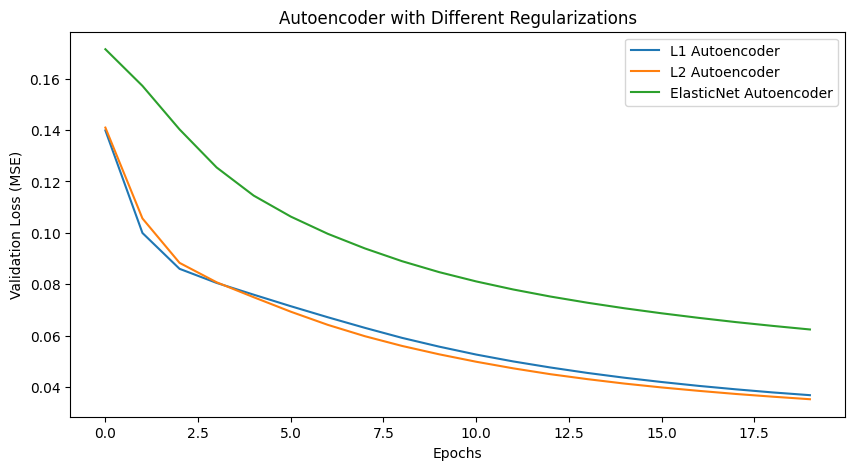

In [11]:
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset (digits dataset for simplicity)
digits = load_digits()
X = digits.data / 16.0   # normalize (0-1)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Input dimension (64 pixels)
input_dim = X.shape[1]
encoding_dim = 32   # compressed dimension

# -------------------- 1. L1 Regularized Autoencoder --------------------
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(1e-5))(input_img)
decoded = Dense(input_dim, activation="sigmoid")(encoded)

autoencoder_l1 = Model(input_img, decoded)
autoencoder_l1.compile(optimizer="adam", loss="mse")

# -------------------- 2. L2 Regularized Autoencoder --------------------
input_img2 = Input(shape=(input_dim,))
encoded2 = Dense(encoding_dim, activation="relu",
                 activity_regularizer=regularizers.l2(1e-5))(input_img2)
decoded2 = Dense(input_dim, activation="sigmoid")(encoded2)

autoencoder_l2 = Model(input_img2, decoded2)
autoencoder_l2.compile(optimizer="adam", loss="mse")

# -------------------- 3. Elastic Net Regularized Autoencoder --------------------
# Combine L1 + L2
input_img3 = Input(shape=(input_dim,))
encoded3 = Dense(encoding_dim, activation="relu",
                 activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(input_img3)
decoded3 = Dense(input_dim, activation="sigmoid")(encoded3)

autoencoder_elastic = Model(input_img3, decoded3)
autoencoder_elastic.compile(optimizer="adam", loss="mse")

# -------------------- Train All --------------------
history_l1 = autoencoder_l1.fit(X_train, X_train, epochs=20, batch_size=64,
                                shuffle=True, validation_data=(X_test, X_test), verbose=0)
history_l2 = autoencoder_l2.fit(X_train, X_train, epochs=20, batch_size=64,
                                shuffle=True, validation_data=(X_test, X_test), verbose=0)
history_elastic = autoencoder_elastic.fit(X_train, X_train, epochs=20, batch_size=64,
                                          shuffle=True, validation_data=(X_test, X_test), verbose=0)

# -------------------- Plot Training Loss --------------------
plt.figure(figsize=(10, 5))
plt.plot(history_l1.history["val_loss"], label="L1 Autoencoder")
plt.plot(history_l2.history["val_loss"], label="L2 Autoencoder")
plt.plot(history_elastic.history["val_loss"], label="ElasticNet Autoencoder")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss (MSE)")
plt.title("Autoencoder with Different Regularizations")
plt.legend()
plt.show()
